In [1]:
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import IPython

Importing Files

In [2]:
def load_dataset_files(file_path):
    file_attribute_collection = {}
    wave_files_path = []
    total_duration = 0

    for subdir, dirs, files in os.walk(file_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            file_name, file_attribute, file_extension = file.split(".")[0], file.split(".")[1], file.split(".")[-1]

            if file_extension not in ["wav", "txt"]:
                continue

            if file_name not in file_attribute_collection:
                file_attribute_collection[file_name] = {}
            file_attribute_collection[file_name][file_attribute] = file_path

            if file_attribute == "wav":
                wave_files_path.append(file_path)
                # Get the length of the audio file
                sample_rate, samples = wavfile.read(file_path)
                duration = len(samples) / sample_rate
                total_duration += duration

    return file_attribute_collection, wave_files_path, total_duration

Loading Data Set

In [3]:
development_data_set_path='dataset/dev-clean/LibriTTS/dev-clean/'
training_data_set_path='dataset/train-clean-360/LibriTTS/train-clean-360/'
testing_data_set_path='dataset/test-clean/LibriTTS/test-clean/'

development_file_attribute_collection, development_wave_files_path, development_duration_total = load_dataset_files(development_data_set_path)
training_file_attribute_collection, training_wave_files_path, training_duration_total = load_dataset_files(training_data_set_path)
testing_file_attribute_collection, testing_wave_files_path, testing_duration_total = load_dataset_files(testing_data_set_path)

print("Loaded in: \n- development_file_attributions:", len(development_file_attribute_collection), "\n- development_wave_files:", len(development_wave_files_path))
print("   - Total duration:", development_duration_total/3600, "hours")
print("Loaded in: \n- training_file_attributions:", len(training_file_attribute_collection), "\n- training_wave_files:", len(training_wave_files_path))
print("   - Total duration:", training_duration_total/3600, "hours")
print("Loaded in: \n- testing_file_attributions:", len(testing_file_attribute_collection), "\n- testing_wave_files:", len(testing_wave_files_path))
print("   - Total duration:", testing_duration_total/3600, "hours")

Loaded in: 
- development_file_attributions: 5736 
- development_wave_files: 5736
   - Total duration: 8.970209027777772 hours
Loaded in: 
- training_file_attributions: 116500 
- training_wave_files: 116500
   - Total duration: 191.29491155092398 hours
Loaded in: 
- testing_file_attributions: 4837 
- testing_wave_files: 4837
   - Total duration: 8.569031608796292 hours


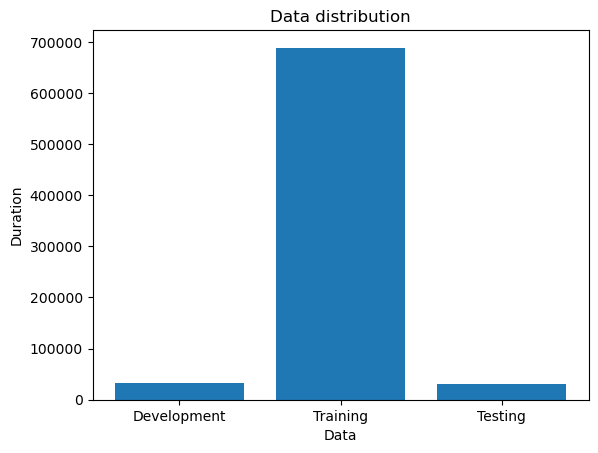

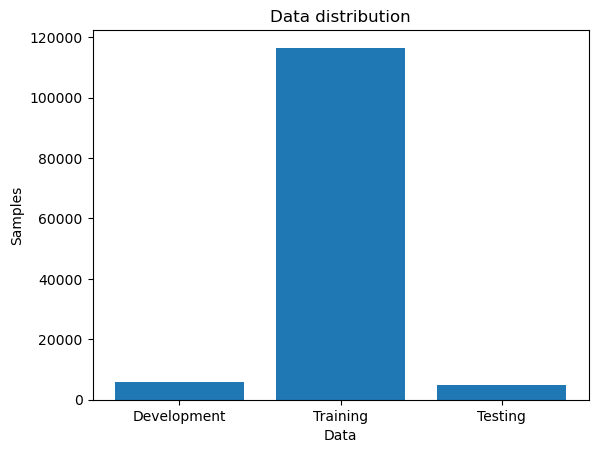

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data distribution duration
fig, ax = plt.subplots()
ax.set_title('Data distribution')
ax.set_xlabel('Data')
ax.set_ylabel('Duration')
ax.bar(['Development', 'Training', 'Testing'], [development_duration_total, training_duration_total, testing_duration_total])
plt.show()

# Data distribution samples
fig, ax = plt.subplots()
ax.set_title('Data distribution')
ax.set_xlabel('Data')
ax.set_ylabel('Samples')
ax.bar(['Development', 'Training', 'Testing'], [len(development_wave_files_path), len(training_wave_files_path), len(testing_wave_files_path)])
plt.show()

Loading audio and its attributes

first_sample: {'normalized': 'dataset/dev-clean/LibriTTS/dev-clean/1272\\128104\\1272_128104_000001_000000.normalized.txt', 'original': 'dataset/dev-clean/LibriTTS/dev-clean/1272\\128104\\1272_128104_000001_000000.original.txt', 'wav': 'dataset/dev-clean/LibriTTS/dev-clean/1272\\128104\\1272_128104_000001_000000.wav'}

sample_rate: 24000 sample_data: [   4    1    0 ... -179    4   78]
length: 1.52 seconds
bit_rate: 384.2315789473684 kbps

TEXT: A 'JOLLY' ART CRITIC


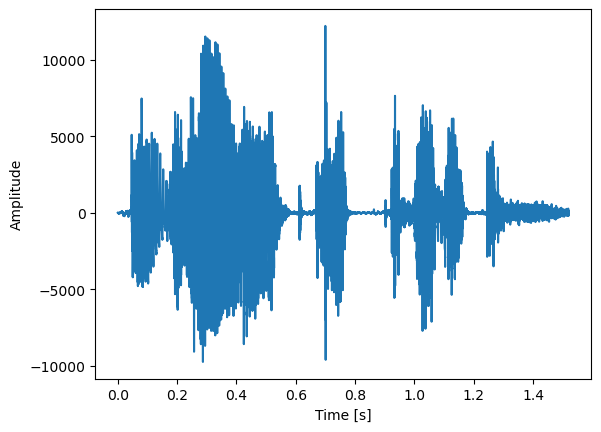

In [5]:
first_sample = development_file_attribute_collection[next(iter(development_file_attribute_collection))]
print("first_sample:", first_sample)

sample_rate, sample_data = wavfile.read(first_sample['wav'])
sample_length = sample_data.shape[0]/sample_rate
print("\nsample_rate:", sample_rate, "sample_data:",sample_data)
print("length:", sample_length, "seconds")
bps_bit_rate = os.path.getsize(first_sample['wav']) * 8 / sample_length
print("bit_rate:", bps_bit_rate/1000, "kbps")

text_from_audio = open(first_sample['normalized'], 'r')
print("\nTEXT:", text_from_audio.read())

time_steps = np.linspace(0, len(sample_data)/sample_rate, len(sample_data))
plt.plot(time_steps, sample_data)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.show()

IPython.display.Audio(first_sample['wav'])


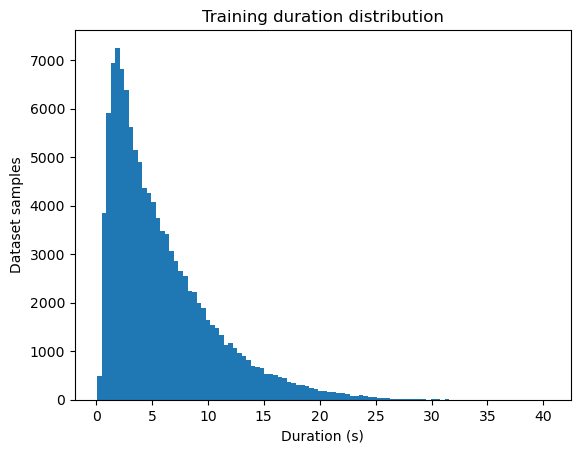

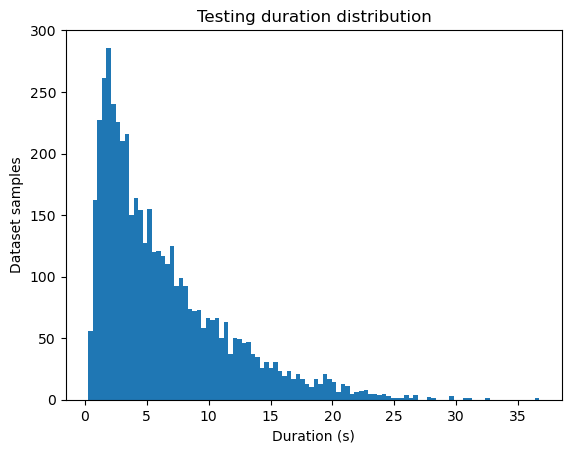

In [6]:
# Sample duration distribution

def plot_duration_distribution(file_attribute_collection, title):
    durations = []
    for sample in file_attribute_collection:
        sample_rate, sample_data = wavfile.read(sample)
        duration = len(sample_data) / sample_rate
        durations.append(duration)
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Dataset samples')
    ax.hist(durations, bins=100)
    plt.show()

plot_duration_distribution(development_wave_files_path, 'Development duration distribution')
plot_duration_distribution(training_wave_files_path, 'Training duration distribution')
plot_duration_distribution(testing_wave_files_path, 'Testing duration distribution')

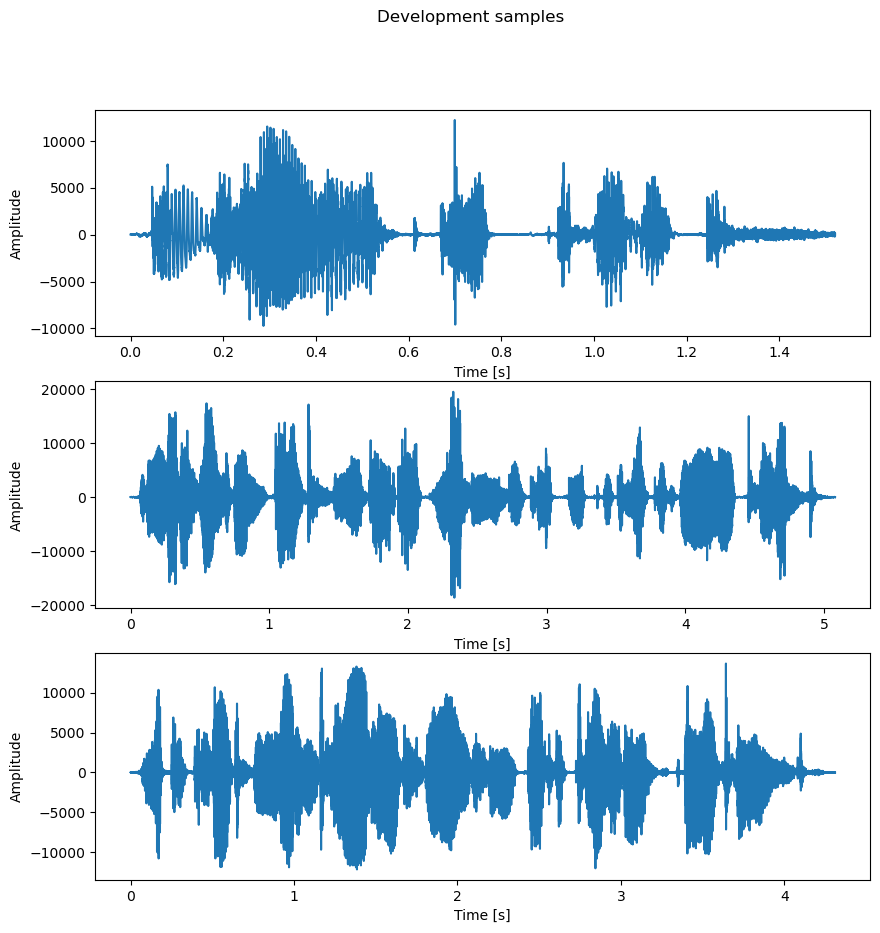

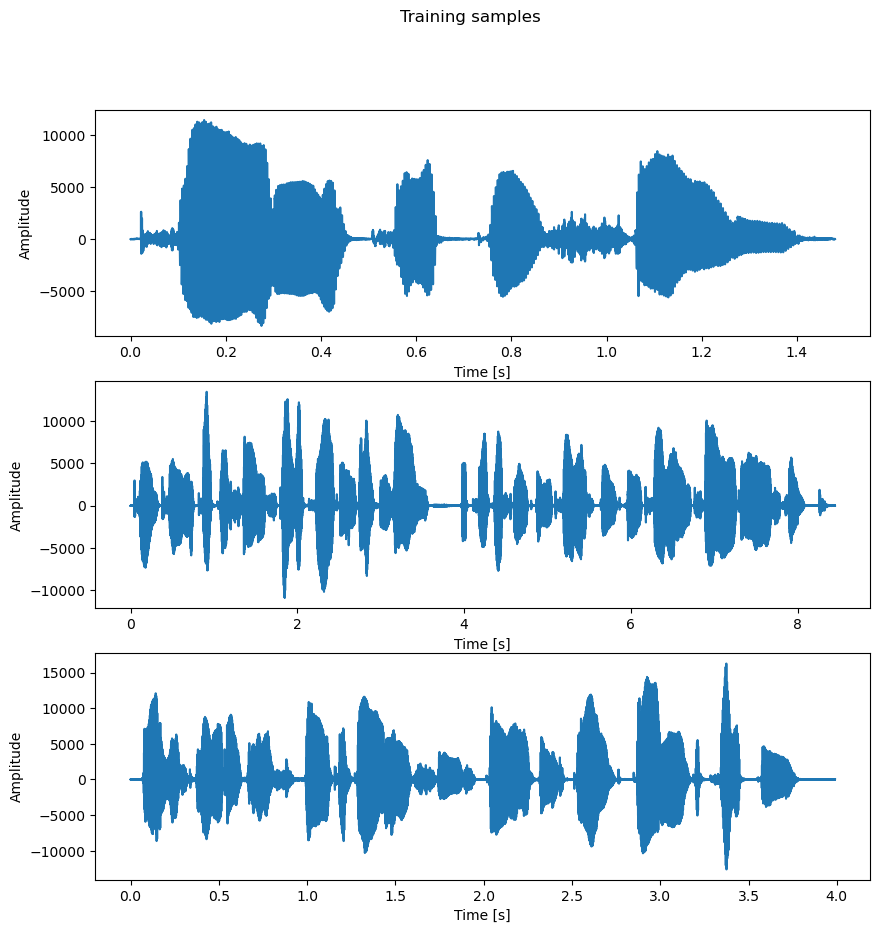

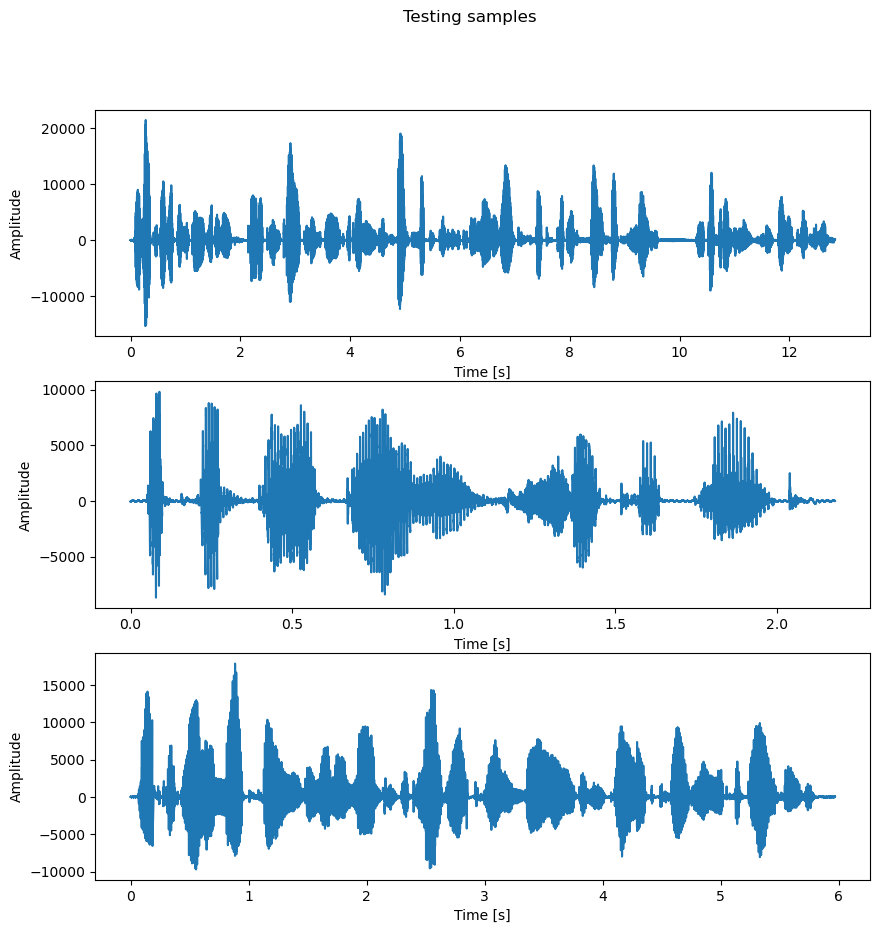

In [7]:
def plot_samples(file_attribute_collection, title):
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))
    fig.suptitle(title)
    for i, sample in enumerate(file_attribute_collection[:3]):
        sample_rate, sample_data = wavfile.read(sample)
        time_steps = np.linspace(0, len(sample_data)/sample_rate, len(sample_data))
        ax[i].plot(time_steps, sample_data)
        ax[i].set_ylabel("Amplitude")
        ax[i].set_xlabel("Time [s]")
    plt.show()

plot_samples(development_wave_files_path, 'Development samples')
plot_samples(training_wave_files_path, 'Training samples')
plot_samples(testing_wave_files_path, 'Testing samples')

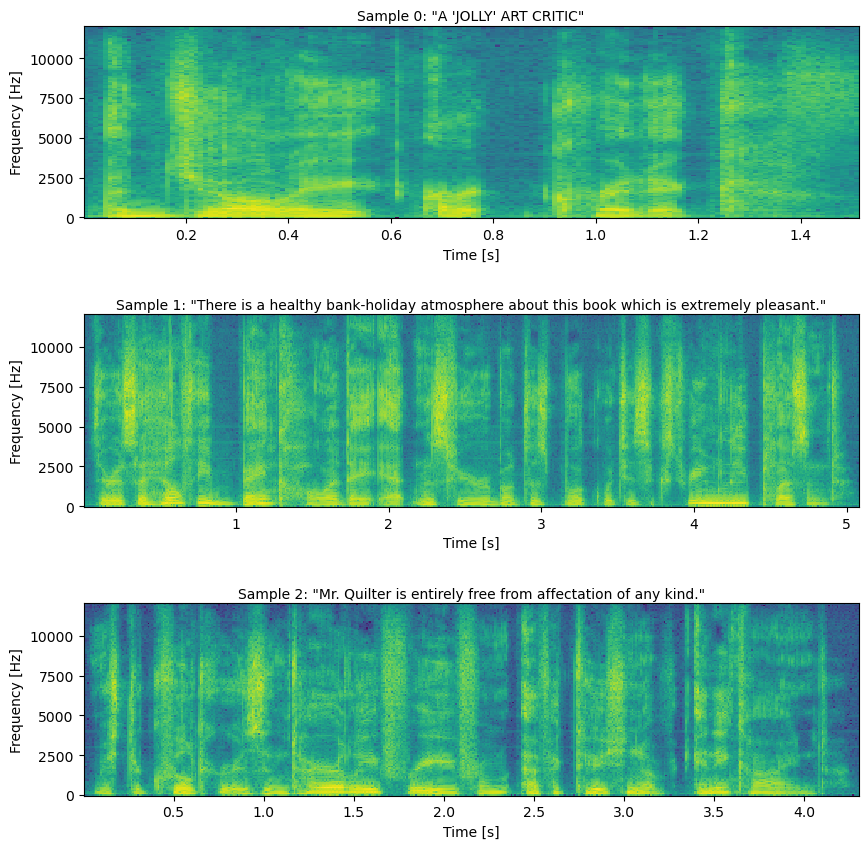

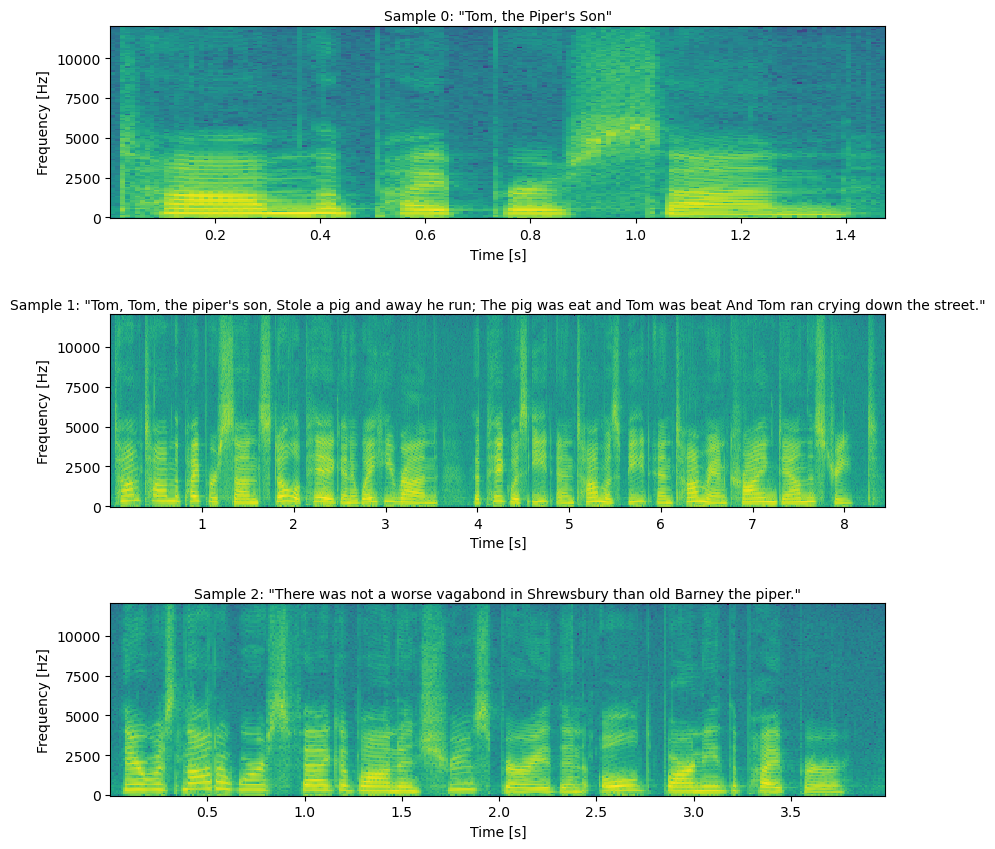

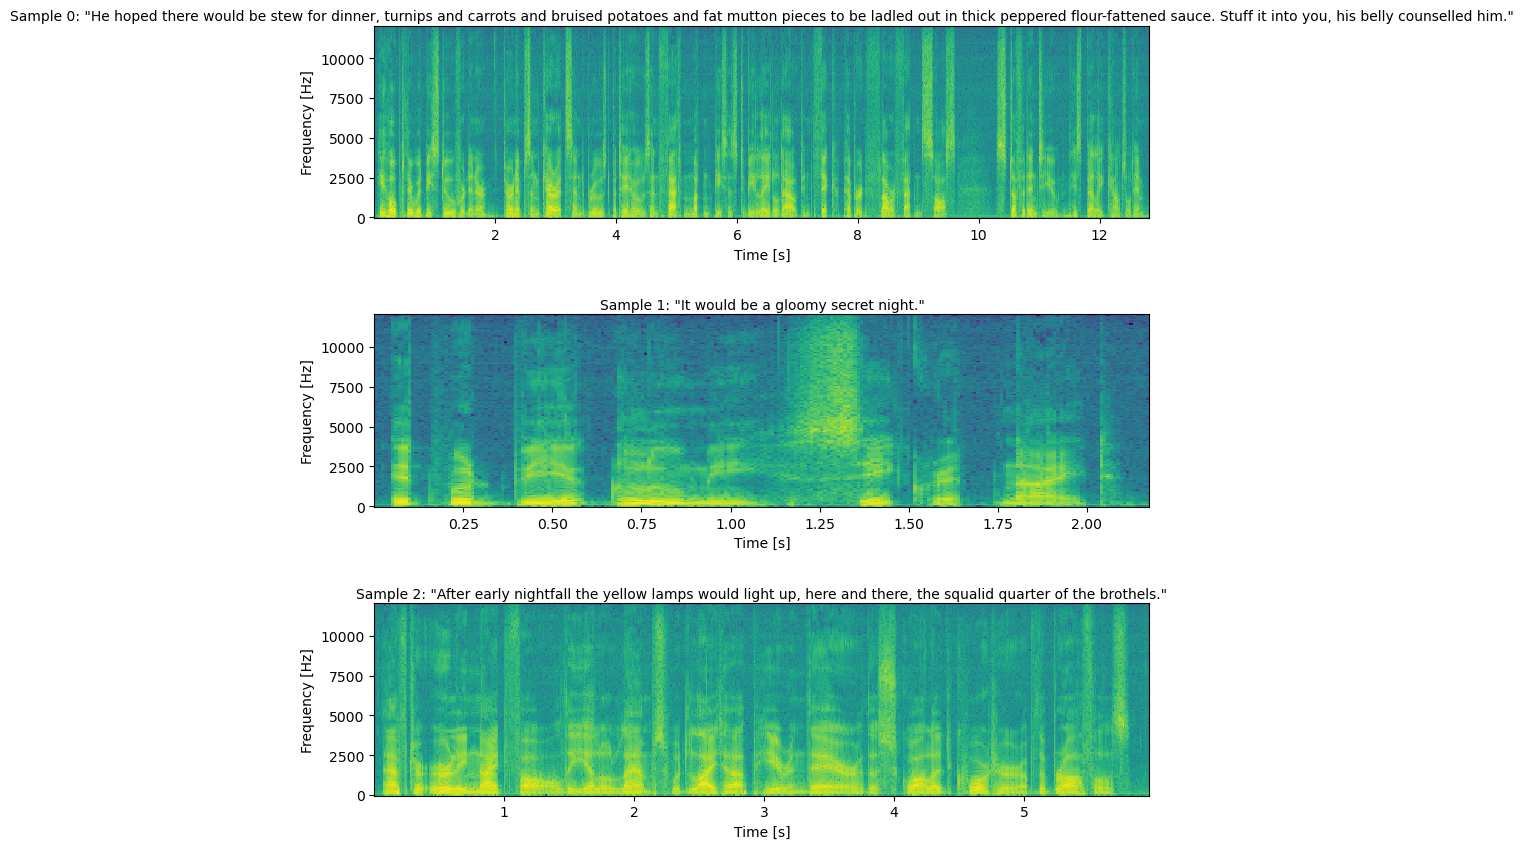

In [32]:
from scipy.signal import spectrogram

def plot_spectrogram(file_attribute_collection, title):
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))
    # fig.suptitle(title)
    for i, sample in enumerate(file_attribute_collection[:3]):
        sample_rate, sample_data = wavfile.read(sample)
        # Original text sentence
        text_file = sample.replace('.wav', '.original.txt')
        text_from_audio = open(text_file, 'r')
        
        # Display the text
        ax[i].text(0.5, 1.05, f"Sample {i}: "+"\""+text_from_audio.read()+"\"", horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)

        f, t, Sxx = spectrogram(sample_data, sample_rate)
        ax[i].pcolormesh(t, f, 10*np.log10(Sxx))
        ax[i].set_ylabel("Frequency [Hz]")
        ax[i].set_xlabel("Time [s]")
    plt.subplots_adjust(hspace=0.5)
    plt.show()

plot_spectrogram(development_wave_files_path, 'Development dataset samples')
plot_spectrogram(training_wave_files_path, 'Training dataset samples')
plot_spectrogram(testing_wave_files_path, 'Testing dataset samples')

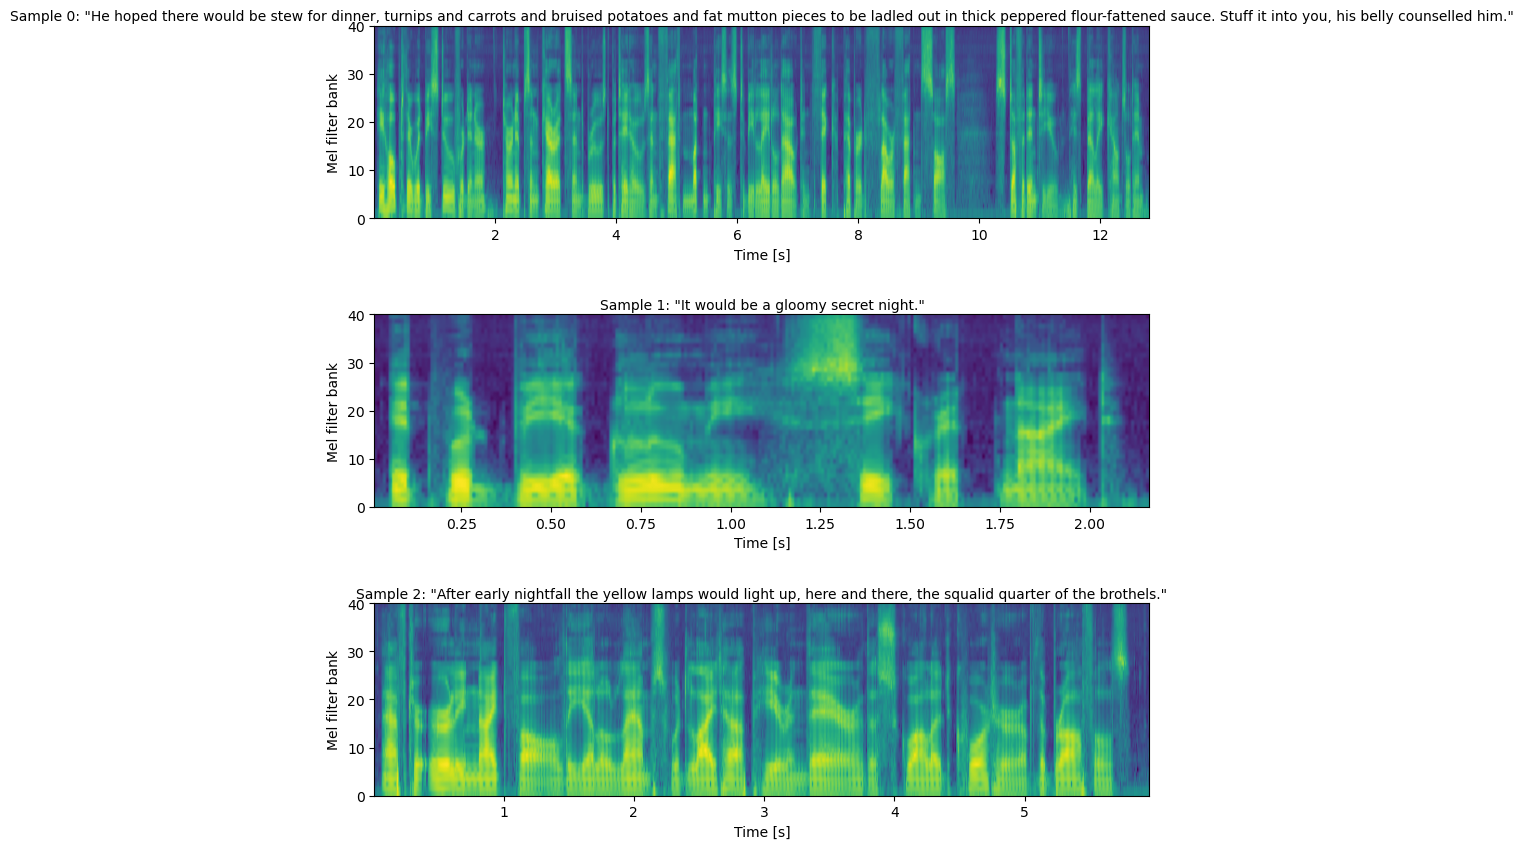

In [31]:
import numpy as np
from scipy import fftpack, signal

def mel_filter_bank(n_filters, n_fft, sample_rate):
    min_freq = 0
    max_freq = sample_rate / 2
    min_mel = 2595 * np.log10(1 + min_freq / 700)
    max_mel = 2595 * np.log10(1 + max_freq / 700)
    mel_points = np.linspace(min_mel, max_mel, n_filters + 2)
    freq_points = 700 * (10**(mel_points / 2595) - 1)
    bins = np.floor((n_fft + 1) * freq_points / sample_rate).astype(int)
    filters = np.zeros((n_filters, n_fft // 2 + 1))
    for i in range(1, n_filters + 1):
        filters[i - 1, bins[i - 1]:bins[i]] = (np.arange(bins[i - 1], bins[i]) - bins[i - 1]) / (bins[i] - bins[i - 1])
        filters[i - 1, bins[i]:bins[i + 1]] = 1 - (np.arange(bins[i], bins[i + 1]) - bins[i]) / (bins[i + 1] - bins[i])
    return filters

def plot_mel_spectrogram(file_attribute_collection, title):
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))

    for i, sample in enumerate(file_attribute_collection[:3]):
        sample_rate, sample_data = wavfile.read(sample)
        # If stereo, convert to mono
        if len(sample_data.shape) > 1:
            sample_data = np.mean(sample_data, axis=1)
        # Original text sentence
        text_file = sample.replace('.wav', '.original.txt')
        text_from_audio = open(text_file, 'r')
        # Display the text
        ax[i].text(0.5, 1.05, f"Sample {i}: "+"\""+text_from_audio.read()+"\"", horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)
        # Compute the spectrogram
        f, t, Sxx = signal.spectrogram(sample_data, sample_rate, nperseg=400, noverlap=200, nfft=512, window=signal.windows.hann(400))
        # Compute the Mel filter bank
        filters = mel_filter_bank(40, 512, sample_rate)
        # Apply the filter bank to the spectrogram
        mel_spectrogram = np.dot(filters, Sxx)
        # Convert to dB
        mel_spectrogram_db = 10 * np.log10(mel_spectrogram)
        # Plot the Mel spectrogram
        ax[i].imshow(mel_spectrogram_db, aspect='auto', origin='lower', extent=[t.min(), t.max(), 0, mel_spectrogram_db.shape[0]])
        ax[i].set_ylabel("Mel filter bank")
        ax[i].set_xlabel("Time [s]")
    plt.subplots_adjust(hspace=0.5)
    plt.show()

plot_mel_spectrogram(development_wave_files_path, 'Development dataset samples')
plot_mel_spectrogram(training_wave_files_path, 'Training dataset samples')
plot_mel_spectrogram(testing_wave_files_path, 'Testing dataset samples')